In [ ]:
# ---------------------4_Assignment_4_Seaborn_PoliceKillingUS-----------------

# WITH SEABORN

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

In [24]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [25]:
df.shape

(2535, 14)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [43]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
df.shape

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [47]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [27]:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

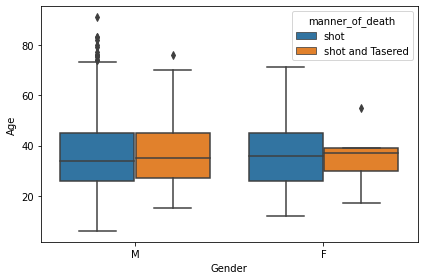

In [65]:
# Seaborn Boxplot

sns.boxplot(data=df, x="gender", y="age", hue = "manner_of_death")

plt.xlabel("Gender")
plt.ylabel("Age")

plt.tight_layout()
plt.show()

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

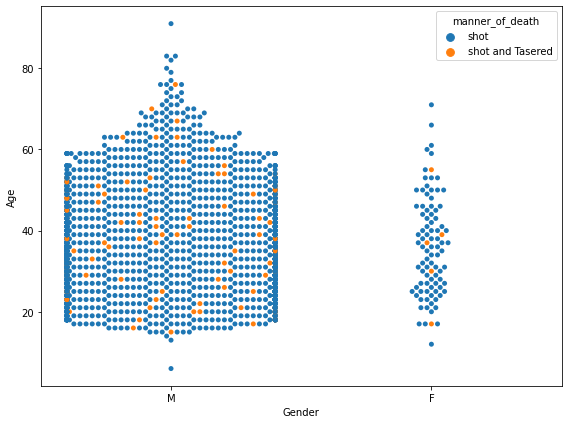

In [67]:
# Seaborn Swarmplot

fig, ax = plt.subplots(figsize=(8,6))

sns.swarmplot(data=df, x="gender", y="age", hue = "manner_of_death")

plt.xlabel("Gender")
plt.ylabel("Age")

plt.tight_layout()
plt.show()

## 2: Plot 12 most dangerous cities

In [56]:
city_freq = df.city.value_counts()[:12]
city_freq

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

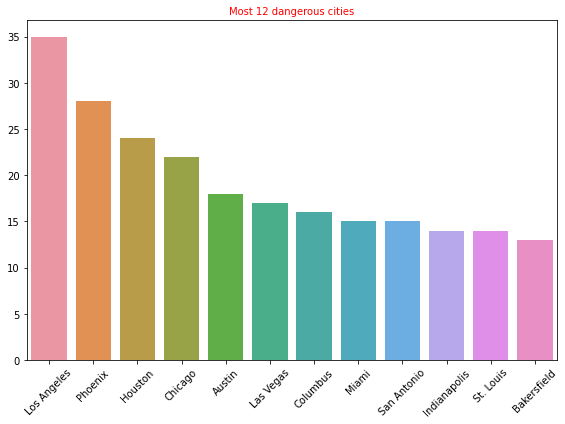

In [68]:
# Seaborn Barplot

fig, ax =plt.subplots(figsize=(8,6))

ax = sns.barplot(x=city_freq.index, y=city_freq.values)

ax.set_xticklabels(city_freq.index, rotation = 45)

ax.set_title('Most 12 dangerous cities',color = 'red',fontsize=10)

plt.tight_layout()
plt.show()

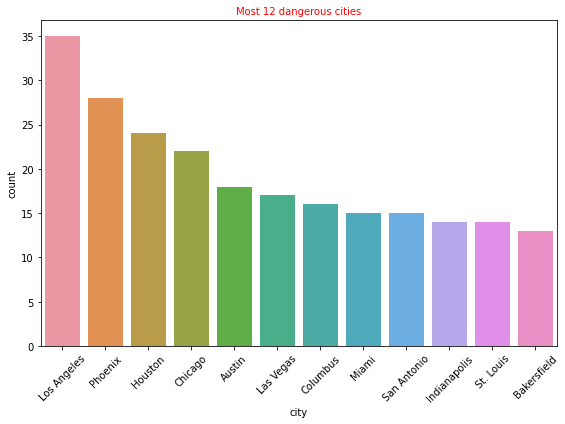

In [69]:
# Seaborn Countplot

fig, ax =plt.subplots(figsize=(8,6))

sns.countplot(data=df, x="city", order=city_freq.index)

ax.set_xticklabels(city_freq.index, rotation = 45)

ax.set_title('Most 12 dangerous cities',color = 'red',fontsize=10)

plt.tight_layout()
plt.show()

## 3: Plot 20 most dangerous states

In [70]:
state_freq = df.state.value_counts()[:20]
state_freq

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

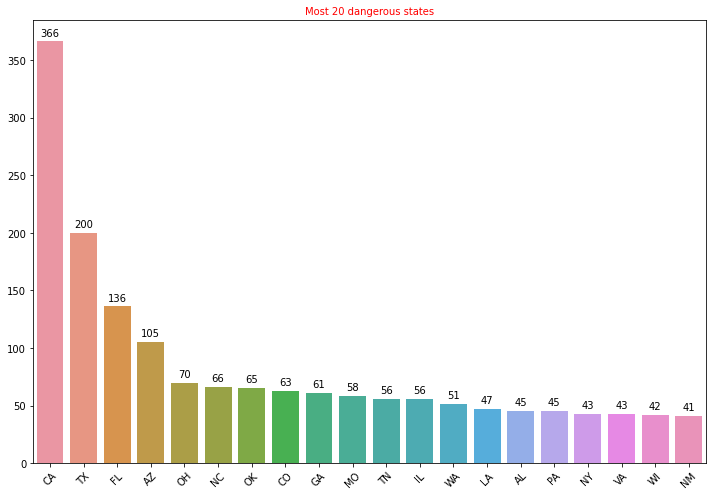

In [81]:
# Seaborn Barplot

fig, ax =plt.subplots(figsize=(10,7))

ax = sns.barplot(x=state_freq.index, y=state_freq.values)

ax.set_xticklabels(state_freq.index, rotation = 45)

ax.set_title('Most 20 dangerous states',color = 'red',fontsize=10)

for index,value in enumerate(df["state"].value_counts().head(20)):
    plt.text(x=index, y=value+5, s=f"{value}", horizontalalignment="center")

plt.tight_layout()
plt.show()

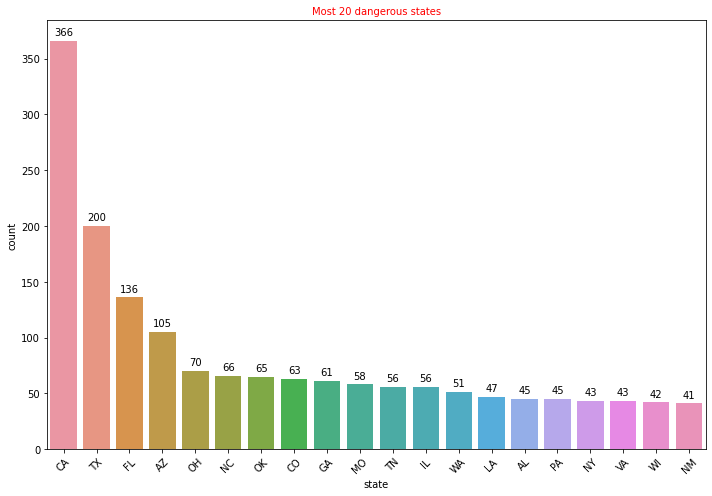

In [83]:
# Seaborn Countplot

fig, ax =plt.subplots(figsize=(10,7))

sns.countplot(data=df, x="state", order=state_freq.index)

ax.set_xticklabels(state_freq.index, rotation = 45)

ax.set_title('Most 20 dangerous states',color = 'red',fontsize=10)

for index,value in enumerate(df["state"].value_counts().head(20)):
    plt.text(x=index, y=value+5, s=f"{value}", horizontalalignment="center")

plt.tight_layout()
plt.show()

## 4: Plot Having mental ilness or not for killed people

In [36]:
illness = df.signs_of_mental_illness.value_counts()
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

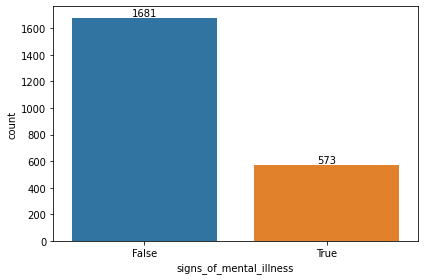

In [93]:
# Seaborn Countplot

fig, ax =plt.subplots(figsize=(6,4))

sns.countplot(df.signs_of_mental_illness)

for index,value in enumerate(df["signs_of_mental_illness"].value_counts()):
    plt.text(x=index, y=value+10, s=f"{value}", horizontalalignment="center")

plt.tight_layout()
plt.show()

## 5: Plot number of Threat Types

In [92]:
threads_freq = df.threat_level.value_counts()
threads_freq

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

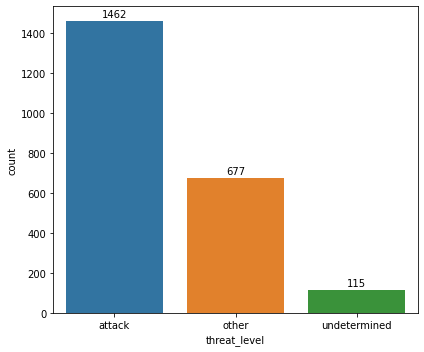

In [96]:
# Seaborn Countplot

fig, ax =plt.subplots(figsize=(6,5))

sns.countplot(df.threat_level)

for index,value in enumerate(df["threat_level"].value_counts()):
    plt.text(x=index, y=value+20, s=f"{value}", horizontalalignment="center")

plt.tight_layout()
plt.show()

## 6: Plot number of Flee Types

In [97]:
flee_freq = df.flee.value_counts()
flee_freq

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

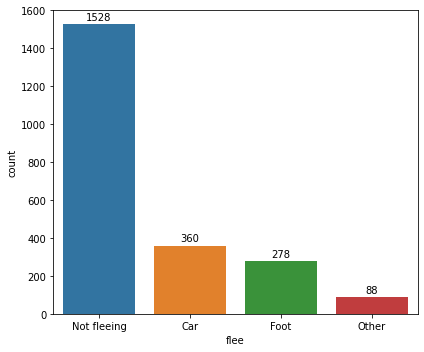

In [99]:
# Seaborn Countplot

fig, ax =plt.subplots(figsize=(6,5))

sns.countplot(df.flee)

for index,value in enumerate(df["flee"].value_counts()):
    plt.text(x=index, y=value+20, s=f"{value}", horizontalalignment="center")

plt.tight_layout()
plt.show()